# Annonymizer

In [2]:
from friendsfamilytest.params import *
from friendsfamilytest.sheethelper import *
from friendsfamilytest.data import *
from friendsfamilytest.utils import *

import pandas as pd 
import seaborn as sns

from wordcloud import WordCloud
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_formats='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
data = pd.read_csv('../friendsfamilytest/data/data.csv')

In [7]:
data.head(2)

,time,rating,free_text,do_better,surgery,free_text_len,do_better_len,rating_score,classif,classif_scores,sentiment,sentiment_score,improvement_labels,polarity,subjectivity,neg,neu,pos,compound,feedback_labels
0,2023-07-13 15:28:22,Extremely likely,"Very friendly caring staff, treated me with re...",Keep it up,Earls Court Surgery,13,3,5.0,NaN,NaN,positive,0,Follow-Up and Continuity of Care,0.4875,0.65,0.124,0.413,0.463,0.8111,Overall Patient Satisfaction
1,2023-07-13 15:29:16,Extremely likely,so good so confidential,NaN,Earls Court Surgery,4,0,5.0,NaN,NaN,positive,0,NaN,0.7000,0.60,0.000,0.484,0.516,0.4927,Patient Privacy and Confidentiality


In [24]:
free_test_list = []

for index, row in data.iterrows():
    text = row['free_text']
    if pd.notna(text):  # This checks if text is not NaN
        free_test_list.append(text)

In [25]:
free_test_list

['Very friendly caring staff, treated me with respect and listened to my problem',
 'so good so confidential',
 'The doctor was very understanding and very knowledgeable.',
 'Dr [PERSON] was extremely nice',
 'I was spoken to politely on the phone and a telephone appointment arranged with my doctor which due to a mistake on a locked phone I wasn’t able to answer but I was called back twice to complete my assessment of my health worry.',
 'Very professional and very kind. I feel comfortable when I attend my appointment there.',
 'Faster appointment & treatment ..',
 'Love the practice',
 'The nurse Miss [PERSON] was absolutely amazing, understanding, kind, fun, thorough, careful! She is the best!',
 'I have been with surgery for considerable  years and was well looked after by Dr [PERSON] & hoping the work ethic continues, apart that good service, good location etc',
 'Efficient, friendly  staff',
 'Good service',
 'Because the staff are very helpful',
 'Nurse [PERSON] is really helpful

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(free_test_list)

In [34]:
from sklearn.cluster import KMeans

n_clusters = 20  # Adjust based on your needs
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

In [35]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X.toarray())

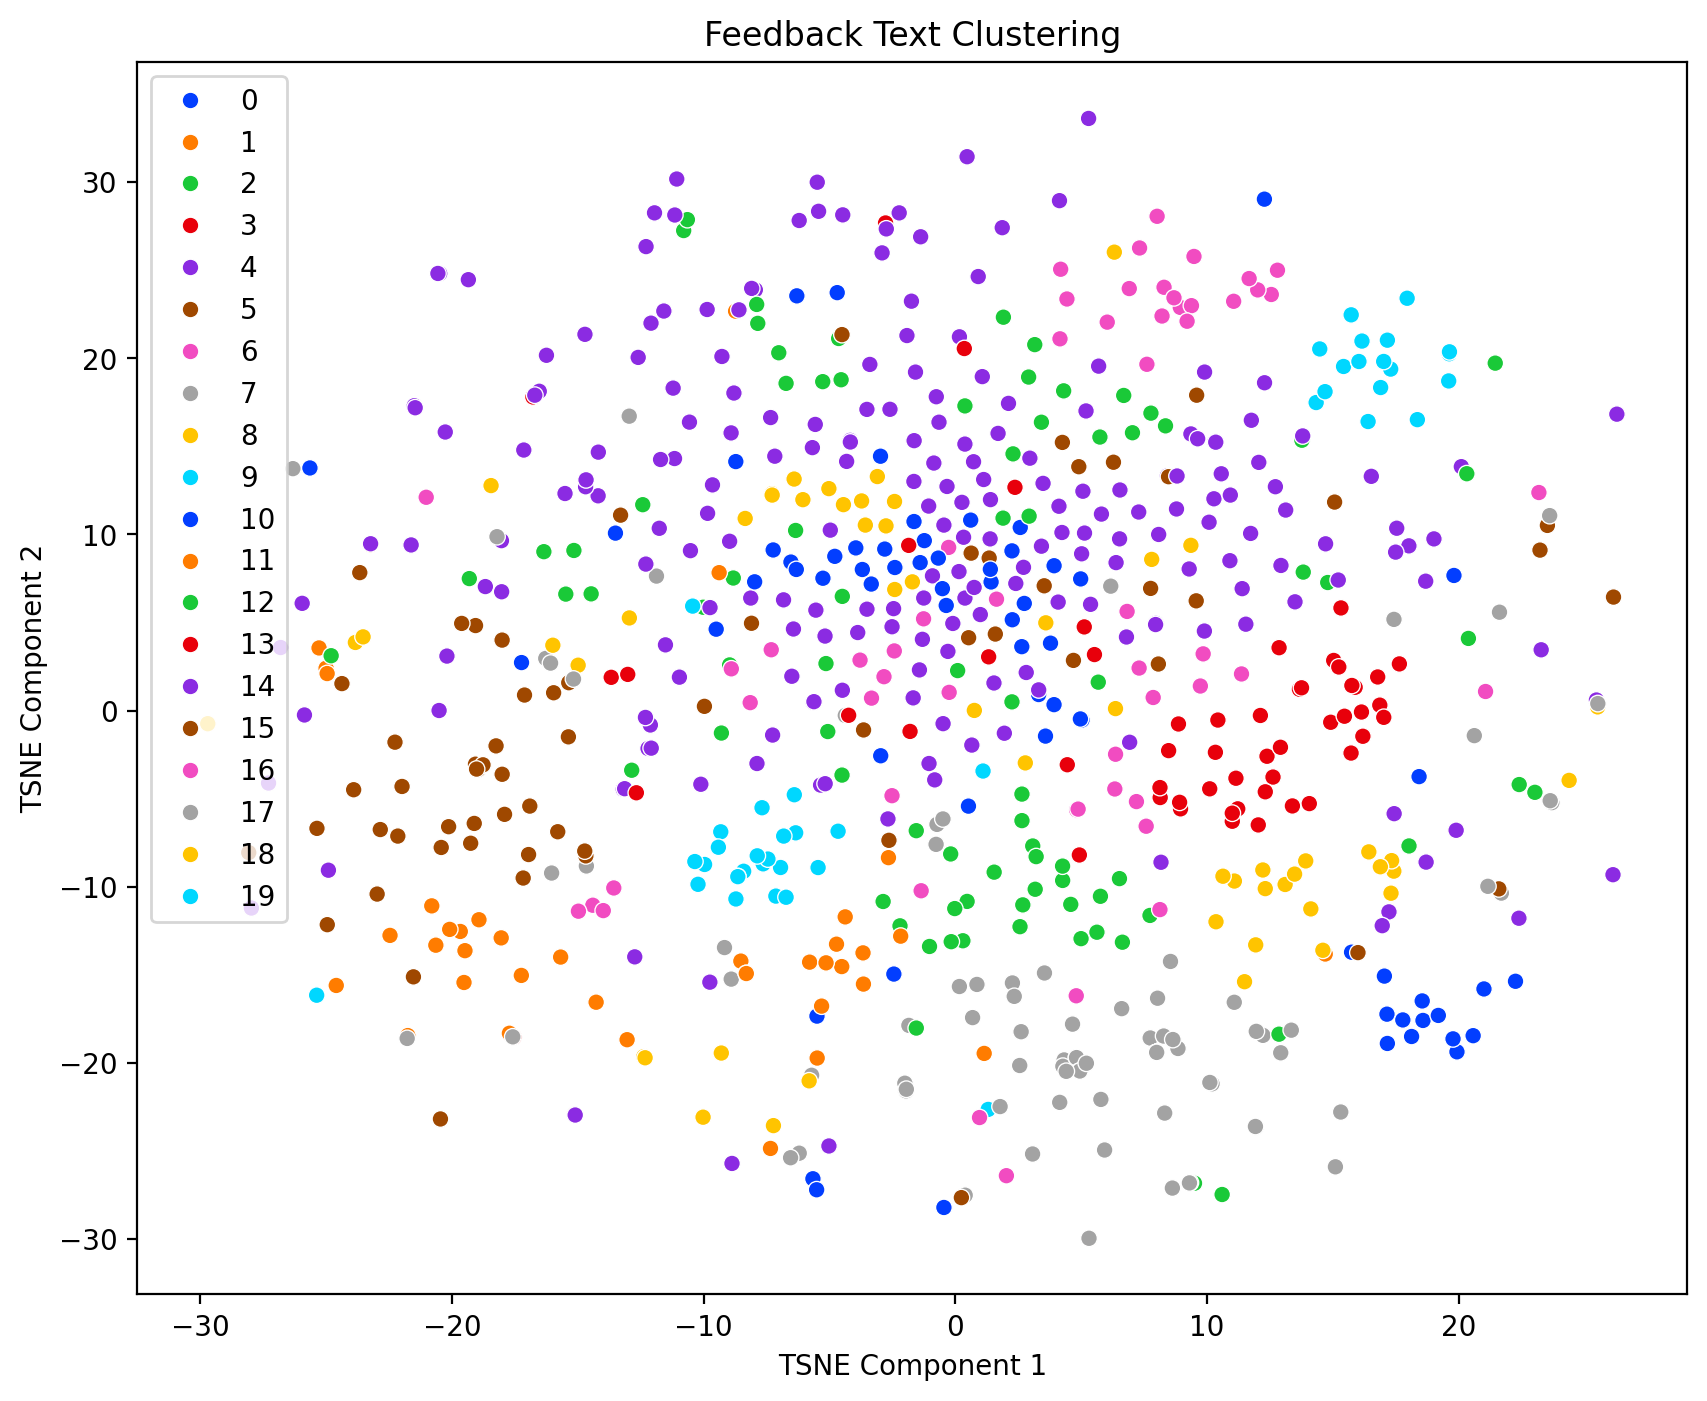

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_reduced is your 2D reduced dataset from TSNE or PCA and 'clusters' contains your cluster labels
palette = sns.color_palette("bright", len(set(clusters)))

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=clusters, legend='full', palette=palette)
plt.title('Feedback Text Clustering')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()

